In [14]:
import wptherml
from matplotlib import pyplot as plt
import numpy as np

# dictionaries for case 1
args_1 = {
     "number_of_excitons": 2,
     "number_of_boson_levels": 2,
     "boson_energy_ev": 0.5 / 3.6749322175665e-2,
     "exciton_energy_ev" : 0.5 / 3.6749322175665e-2,
     "exciton_boson_coupling_ev" : 0.05 / 3.6749322175665e-2
}

sf = wptherml.SpectrumFactory()

# instantiate cases
test_1 = sf.spectrum_factory("Spin-Boson", args_1)


Energy Eigenvalues in atomic units are
[0.25       0.67928932 0.75       0.82071068 1.17928932 1.25
 1.32071068 1.75      ]
Energy eigenvalues in eV are
[ 6.80284656 18.48440411 20.40853968 22.33267526 32.09009723 34.01423281
 35.93836838 47.61992593]


In [15]:
expected_eigenvalues_in_au = np.array([0.25,       0.67928932, 0.75,       0.82071068, 1.17928932, 1.25,
 1.32071068, 1.75])

assert np.allclose(expected_eigenvalues_in_au, test_1.energy_eigenvalues)

In [16]:
print(test_1.exciton_boson_coupling_operator)


[[0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.05 0.   0.   0.  ]
 [0.   0.   0.   0.   0.05 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.05 0.05 0.  ]
 [0.   0.05 0.05 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.05 0.   0.   0.   0.  ]
 [0.   0.   0.   0.05 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]]


In [17]:
expected_coupling_matrix = np.array([[0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  ],
 [0.,   0.,   0.,   0.,   0.05, 0.,   0.,   0.,  ],
 [0.,   0.,   0.,   0.,   0.05, 0.,   0.,   0.,  ],
 [0.,   0.,   0.,   0.,   0.,   0.05, 0.05, 0.,  ],
 [0.,   0.05, 0.05, 0.,   0.,   0.,   0.,   0.,  ],
 [0.,   0.,   0.,   0.05, 0.,   0.,   0.,   0.,  ],
 [0.,   0.,   0.,   0.05, 0.,   0.,   0.,   0.,  ],
 [0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  ]])

assert np.allclose(expected_coupling_matrix, test_1.exciton_boson_coupling_operator)

In [18]:
g_array = np.linspace(0, 0.05, 51)

gs_list = []
lp_list = []
ds_list = []
up_list = []

for g in g_array:
    test_1.exciton_boson_coupling_ev = g
    test_1.exciton_boson_coupling_au = test_1.exciton_boson_coupling_ev * test_1.ev_to_au
    test_1.compute_spectrum()
    gs_list.append(test_1.energy_eigenvalues[0] / test_1.ev_to_au)
    lp_list.append(test_1.energy_eigenvalues[1] / test_1.ev_to_au)
    ds_list.append(test_1.energy_eigenvalues[2] / test_1.ev_to_au)
    up_list.append(test_1.energy_eigenvalues[3] / test_1.ev_to_au)
    


Energy Eigenvalues in atomic units are
[0.25 0.75 0.75 0.75 1.25 1.25 1.25 1.75]
Energy eigenvalues in eV are
[ 6.80284656 20.40853968 20.40853968 20.40853968 34.01423281 34.01423281
 34.01423281 47.61992593]
Energy Eigenvalues in atomic units are
[0.25       0.74994803 0.75       0.75005197 1.24994803 1.25
 1.25005197 1.75      ]
Energy eigenvalues in eV are
[ 6.80284656 20.40712547 20.40853968 20.4099539  34.01281859 34.01423281
 34.01564702 47.61992593]
Energy Eigenvalues in atomic units are
[0.25       0.74989606 0.75       0.75010394 1.24989606 1.25
 1.25010394 1.75      ]
Energy eigenvalues in eV are
[ 6.80284656 20.40571126 20.40853968 20.41136811 34.01140438 34.01423281
 34.01706123 47.61992593]
Energy Eigenvalues in atomic units are
[0.25       0.74984409 0.75       0.75015591 1.24984409 1.25
 1.25015591 1.75      ]
Energy eigenvalues in eV are
[ 6.80284656 20.40429704 20.40853968 20.41278233 34.00999017 34.01423281
 34.01847545 47.61992593]
Energy Eigenvalues in atomic units 

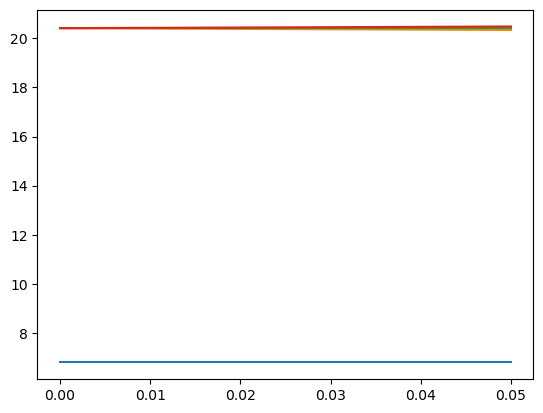

In [19]:
plt.plot(g_array, gs_list)
plt.plot(g_array, lp_list)
plt.plot(g_array, ds_list)
plt.plot(g_array, up_list)
plt.show()
